# Frexcon

## Desafio Data Analitycs

O desafio é o seguinte:

Previsão de demanda é uma projeção realizada com o intuito de prever o potencial de vendas de um ou mais produtos em um cenário futuro. 

Com base em dados e informações, numéricas e intencionais, o objetivo da previsão é aproximar ao máximo a perspectiva da realidade. Embora não seja possível determinar as ações do futuro, a estimativa permite guiar a tomada de decisão e elaborar um planejamento mais estratégico, voltado para as possibilidades reais do negócio.

Nos diversos setores, a previsão de demanda serve de amparo para nortear e orientar as ações mais importantes.

Nós, da Frexco, trabalhamos com produtos perecíveis e muitos deles possuem uma data de validade curta. Acertar na previsão de demanda é essencial para evitarmos o desperdício de alimentos, além de também ser importante garantir que tenhamos o produto disponível no estoque para venda.

Tendo isso em mente, estruture um script no Python que calcule a previsão de demanda para os próximos 5 dias do item, baseando-se no histórico presente na base de dados em anexo.

Obs: O modelo de previsão pode ser o que você julgue ser o melhor, mas atenção aos detalhes de variação nas vendas! 


#### Feito no Google Colaboratory!

## Instalando dependencias

In [2]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 3.6 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 3.3 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 KB 3.9 MB/s eta 0:00:004.7 MB/s eta 0:00:01


In [3]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable


In [5]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [9]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 KB 1.9 MB/s eta 0:00:000:00:010:00:01:01


## Importando bibliotecas necessárias

In [10]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import numpy as np
from datetime import timedelta, date

## Carregando a planilha em um DataFrame

In [11]:
data = pd.read_excel('Dados.xlsx', usecols=[0, 1])

### Manipulando Dataframe

####  Adicionando colunas para os marcadores de tempo

In [12]:
data['DiasDaSemana'] = data['Data'].dt.dayofweek
data['DiasDoMes'] = data['Data'].dt.day

#### Definindo as covariáveis para o modelo

In [13]:
X = data[['DiasDaSemana', 'DiasDoMes']]
X = sm.add_constant(X)
y = data['Vendas']

## Treinando o modelo de regressão linear

In [14]:
model = sm.OLS(y, X).fit()

#### Realizando a previsão para os próximos 5 dias


In [15]:
next_days = pd.DataFrame({'DiasDaSemana': [6, 0, 1, 2, 3],
                          'DiasDoMes': [6, 7, 8, 9, 10]})
next_days = sm.add_constant(next_days)

forecast = model.predict(next_days)

#### Formatando valores

In [20]:
axesY = []
for i in range(5):
  axesY.append(math.floor(forecast[i]))

lastDate = date(2023,1,20)
newDates = []
for x in range(1,6):
  newDates.append((lastDate + timedelta(days=x)).strftime("%d/%m/%Y"))

## Demonstrando resultados

### Função para plotar o gráfico


In [21]:
def Grafico(x, y):
  # Adicionando labels e título
  plt.xlabel('Dias')
  plt.ylabel('Vendas')
  plt.title('Expectativa de vendas para os próximos 5 dias')

  # Plotar gráfico com pontos
  plt.plot(x, y)
  plt.scatter(x, y)

  # Mostrar o gráfico
  plt.show()

### Função para mostrar em dataframe

In [22]:
def Dataframe(x, y):
  print("\nPrevisão de vendas:\n")
  dataframe = pd.DataFrame({'Data': x, 'Vendas': y})
  display(dataframe)

### Demonstrando resultados

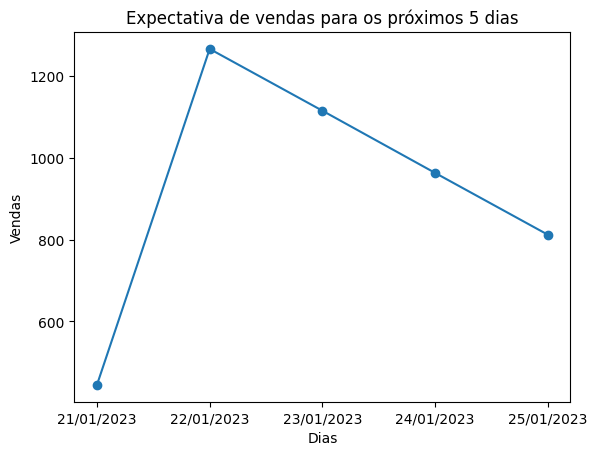


Previsão de vendas:



,Data,Vendas
0,21/01/2023,445
1,22/01/2023,1266
2,23/01/2023,1115
3,24/01/2023,963
4,25/01/2023,812


In [23]:
Grafico(newDates, axesY)

Dataframe(newDates, axesY)